## Importing the dependencies

In [465]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Preparing the data

In [466]:
data = pd.read_csv(r'D:\latihan-lks\latihan-kota-2024\latihan-2\datasets\airbnb.csv')
data.head() # Get a glimpse of the dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Let's see the description of the dataset.

In [467]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [468]:
print('Number of rows: ', len(data))

Number of rows:  48895


Let's see the columns.

In [469]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [470]:
print('Number of columns: ', len(data.columns))

Number of columns:  16


In [471]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

From this information, we can conclude that there are many missing values in the data.

We'll drop the unnecessary columns

In [472]:
data = data.drop(['id', 'name', 'host_id', 'host_name'], axis=1) # Drop unnecessary columns

Let's check the data again.

In [473]:
data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### Checking the missing values

In [474]:
data.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Since the `last_review` and `reviews_per_month` has too many missing values, we'll remove them.

In [475]:
data = data.drop(['last_review', 'reviews_per_month'], axis=1)

#### Check for any potential categorical values

In [476]:
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Seems like the `neighbourhood_group` can be converted into categorical values. 

In [477]:
data['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

Since this cannot be converted, let's drop the column.

In [478]:
data = data.drop(['neighbourhood'],axis=1)

In [479]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Seems like the `room_type` can be converted into categorical values. 

#### Cleaning the outliers

In [480]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   calculated_host_listings_count  48895 non-null  int64  
 8   availability_365                48895 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 3.4+ MB


In [481]:
def get_outliers_indices(column: pd.DataFrame, threshold=3):
    # Column to clean
    to_clean = np.asarray(column.values.tolist())
    
    z_scores = (to_clean - np.mean(to_clean)) / np.std(to_clean)
    
    # > threshold or < threshold
    outliers_indices = np.where(np.abs(z_scores) > threshold)[0]
    
    return outliers_indices

In [482]:
# Check the outliers in every columns except for the object ones
for col in data.drop(['neighbourhood_group', 'room_type'], axis=1):
    outliers_indices = get_outliers_indices(data[col])
    print(f'Number of outliers in {col}: {len(outliers_indices)}')

Number of outliers in latitude: 99
Number of outliers in longitude: 1236
Number of outliers in price: 388
Number of outliers in minimum_nights: 327
Number of outliers in number_of_reviews: 1221
Number of outliers in calculated_host_listings_count: 680
Number of outliers in availability_365: 0


Let's use the pairplot to see the correlation between two pairs of data.

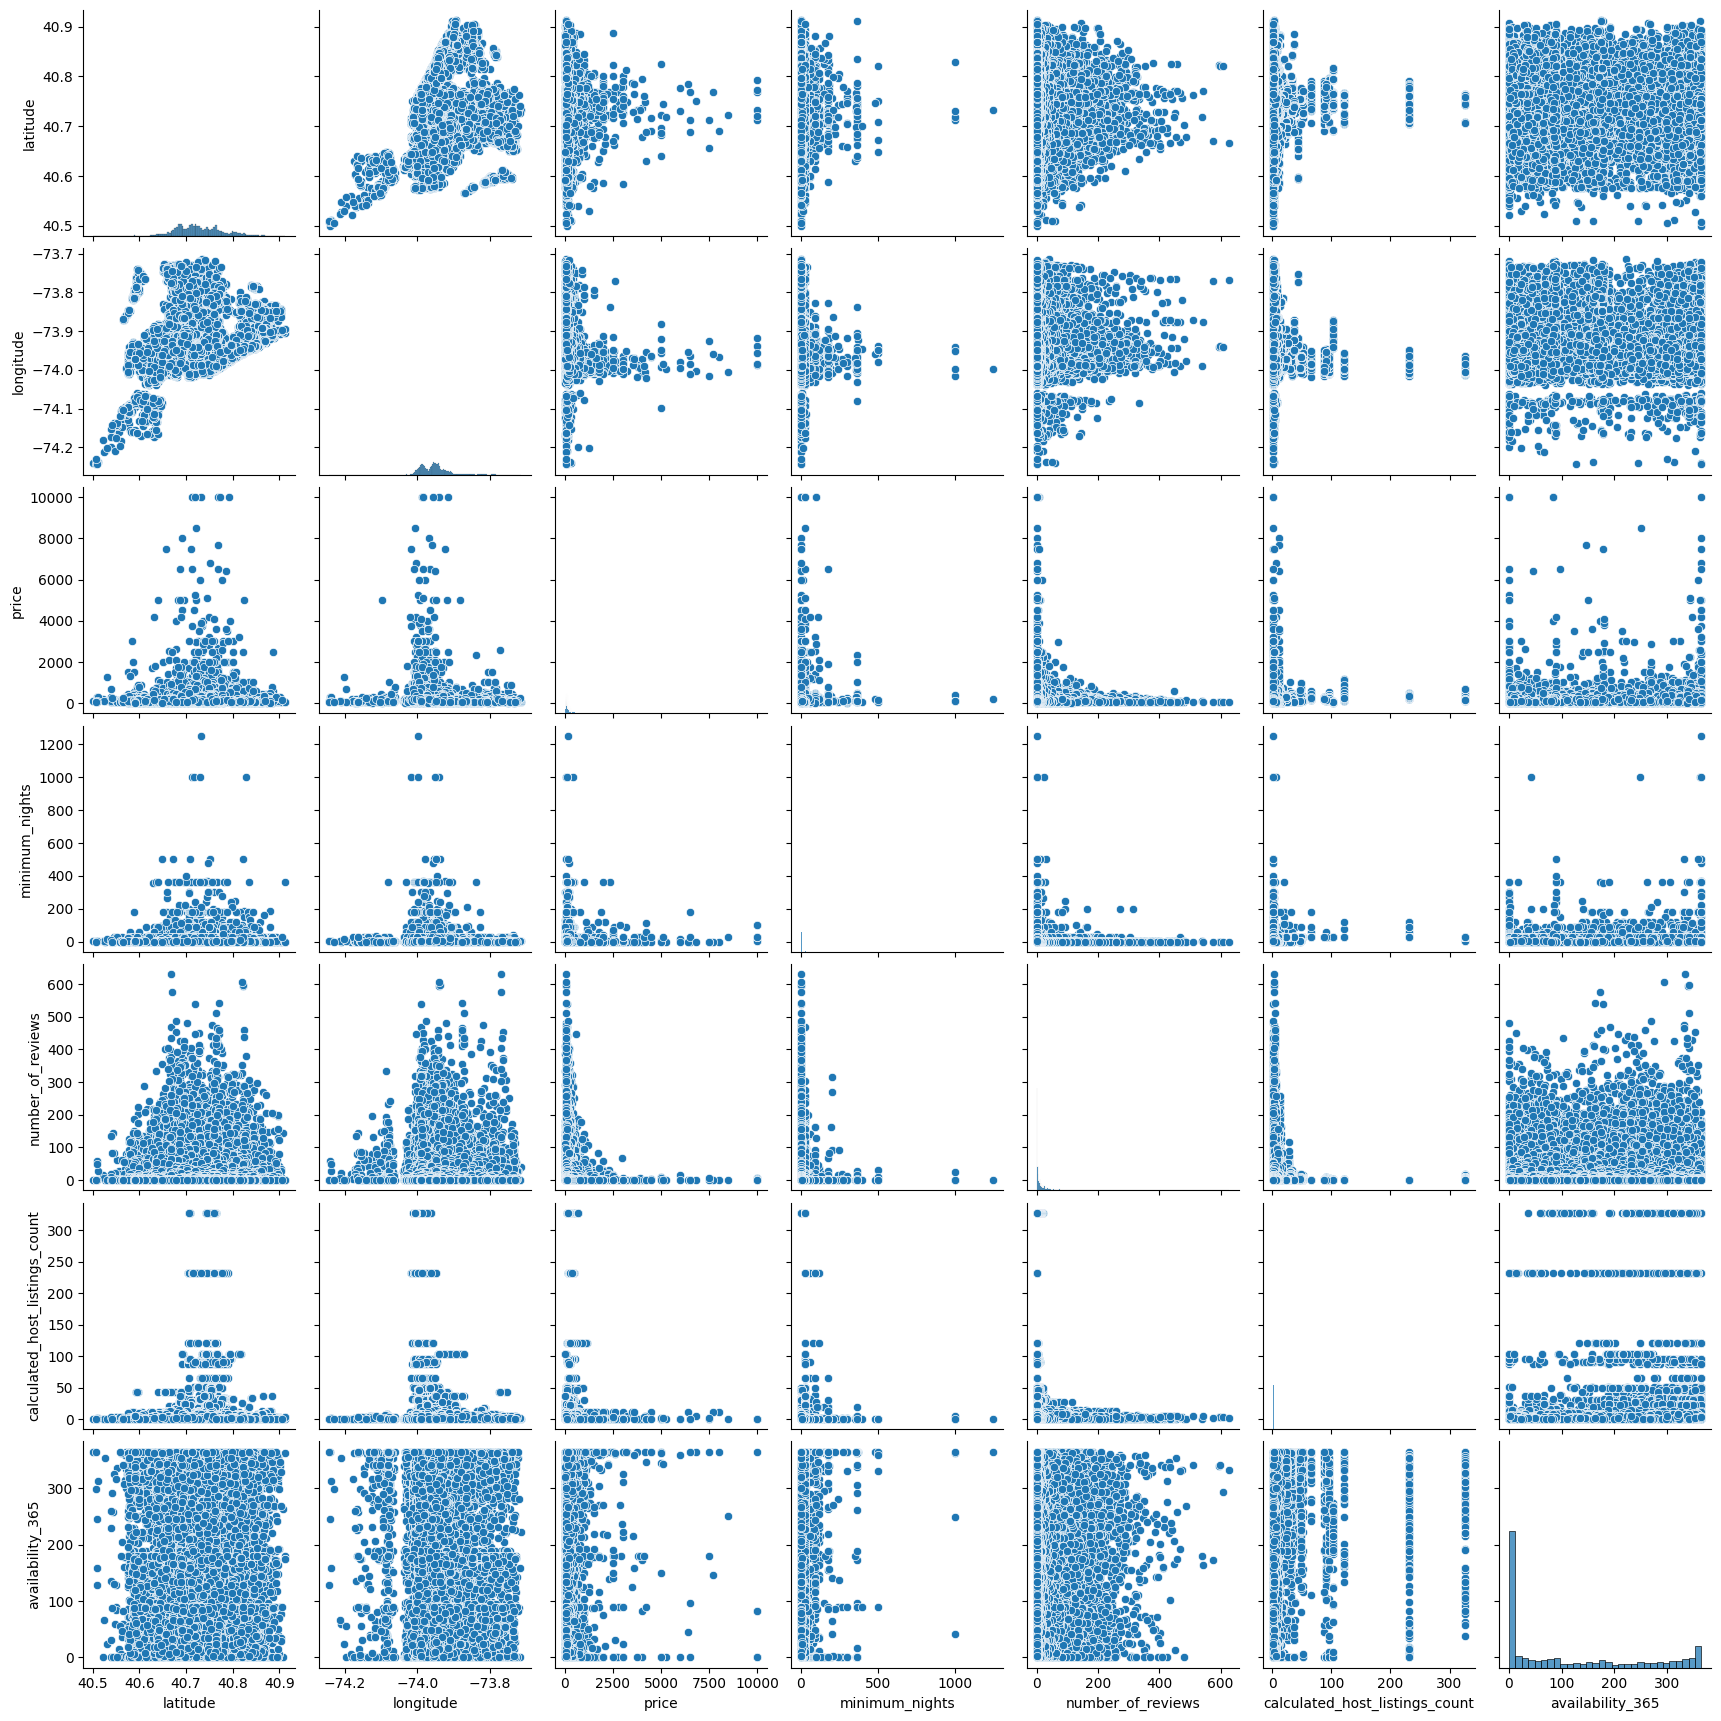

In [483]:
sns.pairplot(data)

## Preprocessing the data

#### Handling the missing values

There are two columns that contains so many missing values: `last_review` and `reviews_per_month`. But we already remove them in the data preparation part.

#### Handling the duplicate values

Let's check if there's any duplicated values.

In [484]:
# Check for duplicated rows
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

In [485]:
# Get the number of duplicated rows
len(data[data.duplicated()])

0

Since there are no duplicated rows, we can move on to the next step.

#### Handling the categorical values

There are two potential columns to be converted to categorical, which is: `neighbourhood_group` and `room_type`.

In [486]:
data['neighbourhood_group']

0         Brooklyn
1        Manhattan
2        Manhattan
3         Brooklyn
4        Manhattan
           ...    
48890     Brooklyn
48891     Brooklyn
48892    Manhattan
48893    Manhattan
48894    Manhattan
Name: neighbourhood_group, Length: 48895, dtype: object

Let's check the available cateogries.

In [487]:
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [488]:
data['neighbourhood_group'] = data['neighbourhood_group'].map(
    {
    'Brooklyn': 0,
    'Manhattan': 1,
    'Queens': 2,
    'Bronx': 3,
    'Staten Island': 4
    }
)

In [489]:
data['neighbourhood_group']

0        0
1        1
2        1
3        0
4        1
        ..
48890    0
48891    0
48892    1
48893    1
48894    1
Name: neighbourhood_group, Length: 48895, dtype: int64

Great! Now let's convert the `room_type`.

In [490]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [491]:
data['room_type'] = data['room_type'].map({'Private room': 0, 'Entire home/apt': 1, 'Shared room': 2})

In [492]:
data['room_type']

0        0
1        1
2        0
3        1
4        1
        ..
48890    0
48891    0
48892    1
48893    2
48894    0
Name: room_type, Length: 48895, dtype: int64

Now that's done, we can move on to the next step.

#### Handling the outliers
Let's use our already made `get_outliers_indices` function.

In [493]:
for col in data.drop(['neighbourhood_group', 'room_type'], axis=1):
    outliers_indices = get_outliers_indices(data[col])
    # Drop the rows that contains outliers
    data: pd.DataFrame = data.drop(outliers_indices, errors='ignore')
    print(f'Number of rows after cleaning {col}: {len(data)}')

Number of rows after cleaning latitude: 48796
Number of rows after cleaning longitude: 47548
Number of rows after cleaning price: 47177
Number of rows after cleaning minimum_nights: 46865
Number of rows after cleaning number_of_reviews: 45737
Number of rows after cleaning calculated_host_listings_count: 45119
Number of rows after cleaning availability_365: 45119


Great! The outliers have been removed. Now we can continue to the next step.

#### Scaling the data
We'll prevent the features that has large values dominating.

In [494]:
def standar_scale(X: np.ndarray):
    mean_X = np.mean(X)
    var_X = np.var(X)
    # The formula for standard scaling: (Xi - mean_X) / sqrt(var_X)
    return (X - mean_X) / np.sqrt(var_X)

Now we're going to apply that to the values of the data.

In [495]:
scaled_values = standar_scale(data.values.tolist())
scaled_values

array([[-0.26459327,  0.09389707, -0.91699225, ..., -0.18521782,
        -0.2116763 ,  2.95452253],
       [-0.25577378,  0.09483309, -0.91709279, ...,  0.13228402,
        -0.24695428,  2.86632758],
       [-0.25577378,  0.09532169, -0.91672352, ..., -0.26459327,
        -0.25577378,  2.95452253],
       ...,
       [-0.25577378,  0.09537222, -0.91678323, ..., -0.26459327,
        -0.25577378, -0.0264669 ],
       [-0.25577378,  0.0948674 , -0.91715761, ..., -0.26459327,
        -0.2116763 , -0.24695428],
       [-0.25577378,  0.09492499, -0.91714183, ..., -0.26459327,
        -0.25577378, -0.06174488]])

We'll convert the `scaled_values` into a DataFrame called `scaled_data`. 

In [496]:
scaled_data = pd.DataFrame(scaled_values, columns=data.columns)

Now let's see the newly made `scaled_data`.

In [497]:
scaled_data.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,-0.264593,0.093897,-0.916992,-0.264593,1.049512,-0.255774,-0.185218,-0.211676,2.954523
1,-0.255774,0.094833,-0.917093,-0.255774,1.719793,-0.255774,0.132284,-0.246954,2.866328
2,-0.255774,0.095322,-0.916724,-0.264593,1.058331,-0.238135,-0.264593,-0.255774,2.954523
3,-0.255774,0.095229,-0.916742,-0.255774,0.440966,-0.176398,-0.185218,-0.255774,-0.264593
4,-0.255774,0.094781,-0.917015,-0.255774,1.499306,-0.238135,0.388049,-0.255774,0.873122


Since we do not need to scale the categorical data, we'll set them to what they was.

In [498]:
scaled_data['room_type'] = np.asarray(data['room_type'].values.tolist())
scaled_data['neighbourhood_group'] = np.asarray(data['neighbourhood_group'].values.tolist())

In [499]:
scaled_data.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,0,0.093897,-0.916992,0,1.049512,-0.255774,-0.185218,-0.211676,2.954523
1,1,0.094833,-0.917093,1,1.719793,-0.255774,0.132284,-0.246954,2.866328
2,1,0.095322,-0.916724,0,1.058331,-0.238135,-0.264593,-0.255774,2.954523
3,1,0.095229,-0.916742,1,0.440966,-0.176398,-0.185218,-0.255774,-0.264593
4,1,0.094781,-0.917015,1,1.499306,-0.238135,0.388049,-0.255774,0.873122


#### Dimensionality reductions
We'll use the PCA technique to reduce the data dimensions. PCA are best implemented in a scaled data.

In [500]:
class PCA:
    def __init__(self, n_features) -> None:
        self.n_features = n_features # Desired dimension(s) after reduced
        self._features = None
        self._mean = None
    
    def fit(self, actual_features: np.ndarray):
        self._mean = np.mean(actual_features, axis=0)
        
        # Find the X centered
        X_centered: np.ndarray = actual_features - self._mean
        
        # Get the covariance matrix
        cov_matrix = np.cov(X_centered.T)
        
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        
        # Transpose the eigenvectors
        eigenvectors = eigenvectors.T
        # Sorted indices ascending
        indices = np.argsort(eigenvalues)[::-1]
        
        # Reorders the eigenvectors
        eigenvectors = eigenvectors[indices]
        
        self._features = eigenvectors[:self.n_features]
        
    def transform(self, actual_features: np.ndarray):
        # Find the X centered
        X_centered: np.ndarray = actual_features - self._mean
        
        # Project the data onto principal features
        projected: np.ndarray = np.dot(X_centered, self._features.T)
        
        return projected
    
    def fit_transform(self, actual_features: np.ndarray):
        self.fit(actual_features)
        return self.transform(actual_features)

Now we'll reduce the dimensions of the data.

In [501]:
pca = PCA(2) # Initialize the PCA dimensions transformer
pca_values = pca.fit_transform(scaled_data.values.tolist())
pca_values

array([[-0.06840968, -2.06403844],
       [-0.78901756, -2.11109906],
       [-0.08406683, -2.20976921],
       ...,
       [ 0.35416242,  0.69422436],
       [ 0.8408042 ,  0.87373908],
       [ 0.63051461,  0.71878143]])

Great! Now we have the 2-dimension version of the data.

In [502]:
pca_data = pd.DataFrame(pca_values, columns=['PC1', 'PC2'])
pca_data.head()

,PC1,PC2
0,-0.068410,-2.064038
1,-0.789018,-2.111099
2,-0.084067,-2.209769
3,0.677167,0.903605
4,-0.443492,-0.183933


Let's try to plot the data.

In [503]:
X = np.asarray(pca_data.values.tolist())

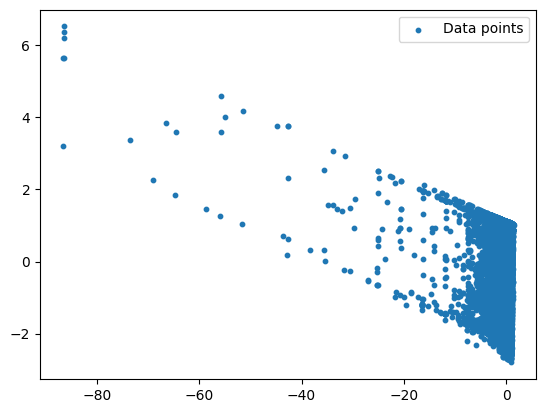

In [504]:
plt.scatter(X[:, 0], X[:, 1], s=10, label='Data points')
plt.legend()
plt.show()

Now that's done, we're going to move onto the next process.

## Making the model

We'll make a function to visualize the clusters.

In [505]:
def plot_clusters(X: np.ndarray, centroids: np.ndarray, labels: np.ndarray):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, label='Data points')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=50, label='Centeroids')
    plt.title('Clusters')
    plt.legend()
    plt.grid(True)
    plt.show()

In [518]:
class KMeans:
    def __init__(self, k, max_iters=300, n_init=10) -> None:
        self.k = k # Number of clusters
        self.max_iters = max_iters # Max iterations
        self.n_init = n_init # Number of initializations
        self._centroids = None # Centroids
        self._labels = None # Labels
        self._inertia = None # SSD
    
    def _assign_labels(self, X: np.ndarray, centroids: np.ndarray):
        # Calculate distances using euclidean distance
        distances = np.sqrt((X - centroids[:, np.newaxis]) ** 2).sum(axis=2)
        # Returns the minimum distances along the first axis
        return np.argmin(distances, axis=0)
    
    def _update_centroids(self, X: np.ndarray, labels: np.ndarray):
        # Initialize centroids
        centroids = np.zeros((self.k, X.shape[1]))
        
        # Iterates over k
        for i in range(self.k):
            centroids[i] = np.mean(X[labels == i], axis=0)
        
        return centroids
    
    def _calc_inertia(self, X: np.ndarray, centroids: np.ndarray, labels: np.ndarray):
        inertia = 0
        for i in range(self.k):
            # Get the data points that's in the current cluster
            cluster_points = X[labels == i]
            # Calculate the inertia (Xi - centroid)
            inertia += np.sum((cluster_points - centroids[i]) ** 2)
        
        self._inertia = inertia
    
    def fit(self, X: np.ndarray, visualize=False):
        # Initialize centroids positions randomly
        centroids: np.ndarray = X[np.random.choice(X.shape[0], self.k)]
        
        labels = None
        
        for iter in range(self.max_iters):
            # Calculate distances and assign labels
            labels = self._assign_labels(X, centroids)
            # Calculate the new centroids
            new_centroids = self._update_centroids(X, labels)

            # If the centroids does not change, then break
            if np.all(centroids == new_centroids):
                # Visualize per initialization end only
                if visualize:
                    print(f"Last iteration: {iter + 1}")
                    plot_clusters(X, centroids, labels)
                break
            
            centroids = new_centroids
            
            if visualize and (iter % 5 == 0):
                print(f"Iteration: {iter + 1}")
                plot_clusters(X, centroids, labels)
        
        self._centroids = centroids
        self._labels = labels
        self._calc_inertia(X, centroids, labels)
        

Let's test the model and the visualization.

Iteration: 1


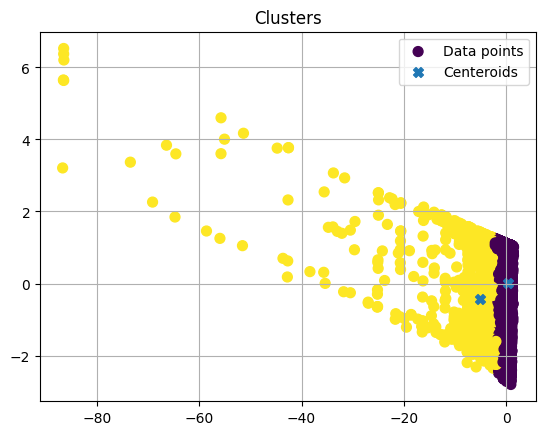

Iteration: 6


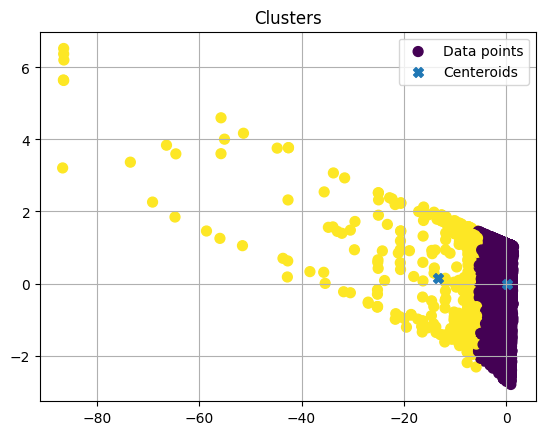

Iteration: 11


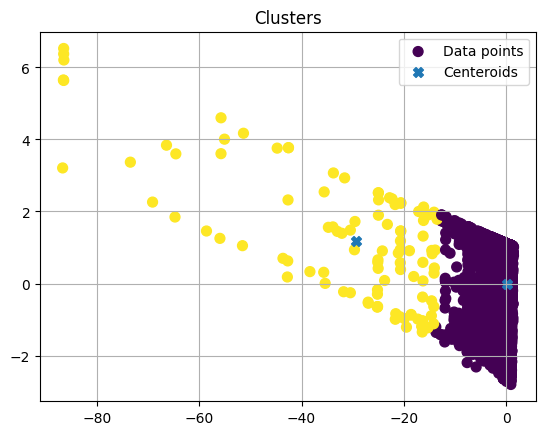

Last iteration: 14


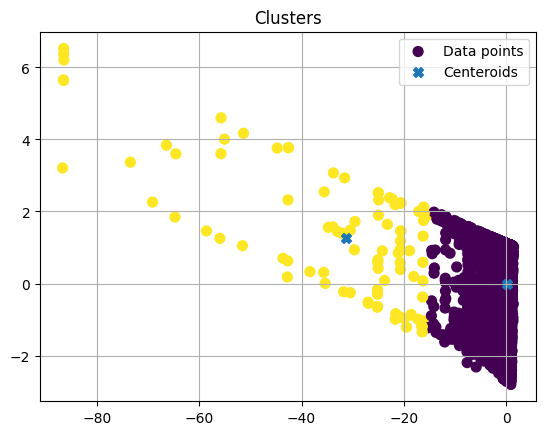

In [519]:
model = KMeans(2) # Setting the `k` to 2 for the sake of testing
model.fit(X, visualize=True)

Great! Now that the model is working, we gotta find the most efficient value of `k`. We'll use the elbow method for that.

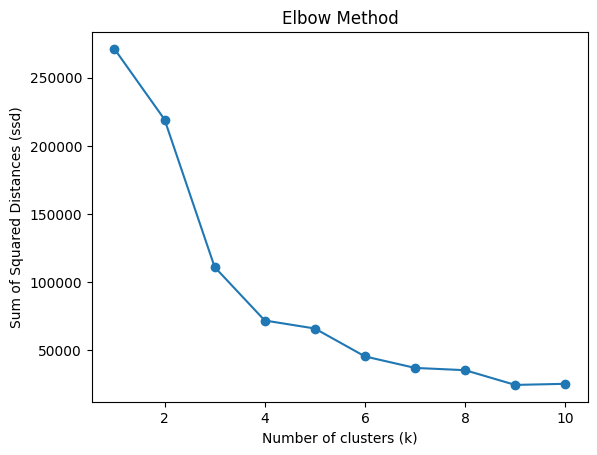

In [520]:
def elbow_method(max_k: int):
    ssd = list()
    
    for k in range(1, max_k + 1):
        model = KMeans(k)
        model.fit(X)
        ssd.append(model._inertia)
    
    plt.plot(range(1, max_k + 1), ssd, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Sum of Squared Distances (ssd)')
    plt.title('Elbow Method')
    plt.show()

elbow_method(10)

To find the optimal value of `k`, we'll want to see where the plot exhibits an "elbow" shape or a sharp change in slope. This point typically represents where adding a value to `k` does not improve the sum of squared distance anymore. In this case, we'll want to use 4 as the value of `k` since it represents that. 

Iteration: 1


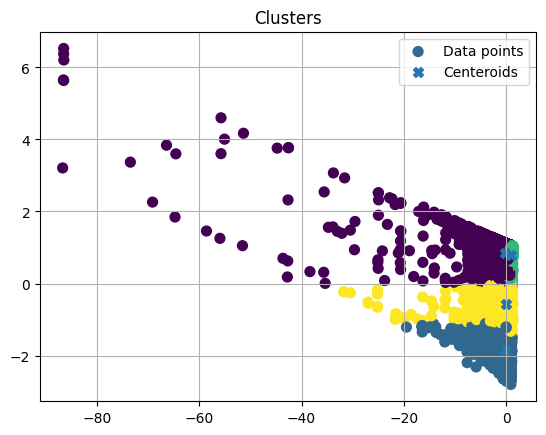

Iteration: 6


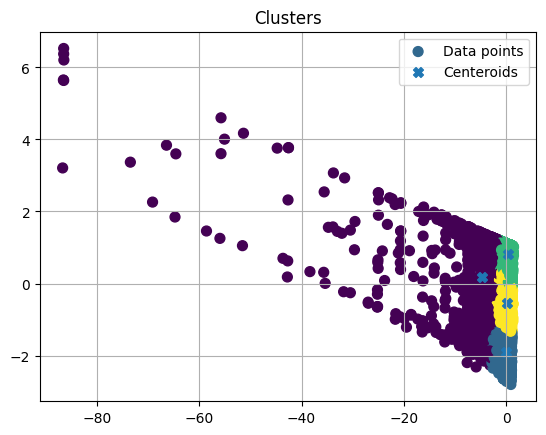

Iteration: 11


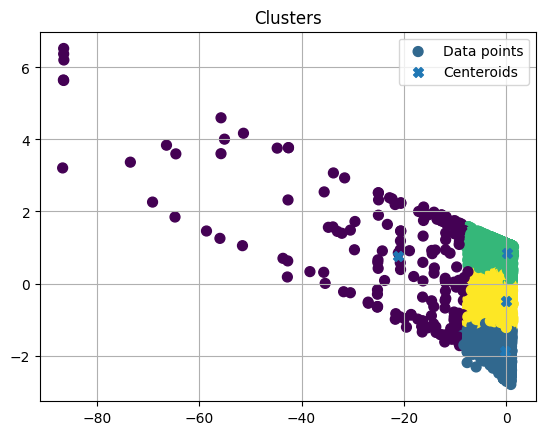

Iteration: 16


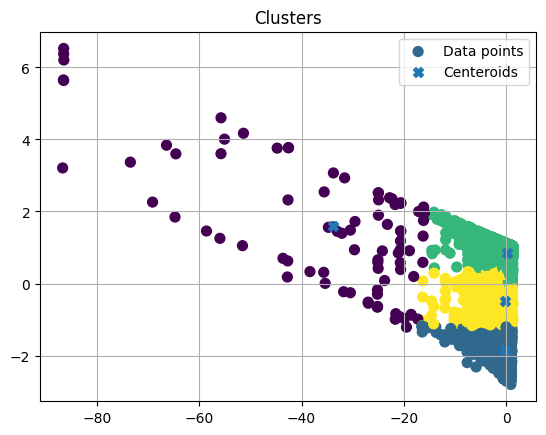

Iteration: 21


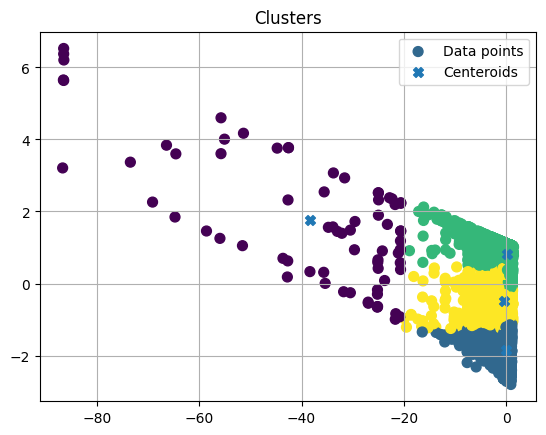

Iteration: 26


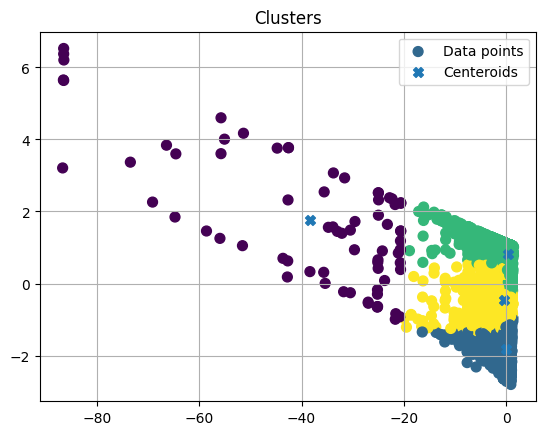

Iteration: 31


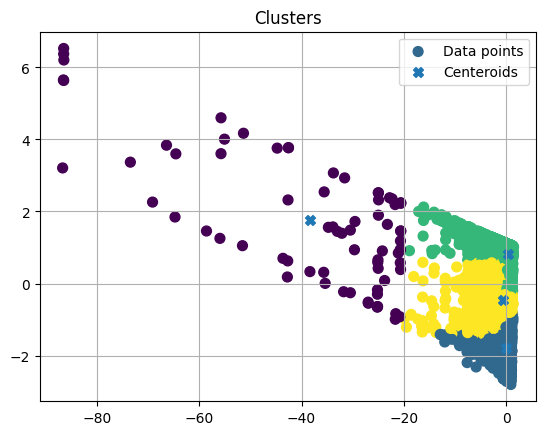

Iteration: 36


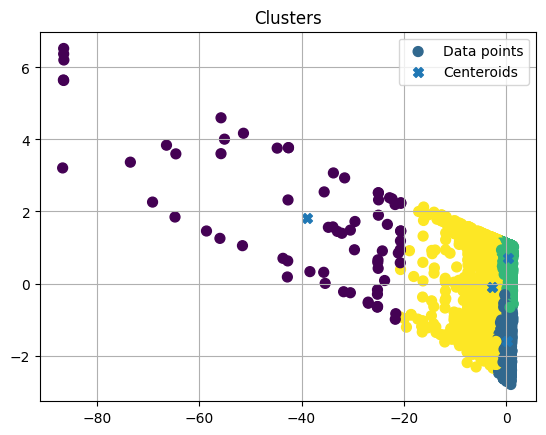

Iteration: 41


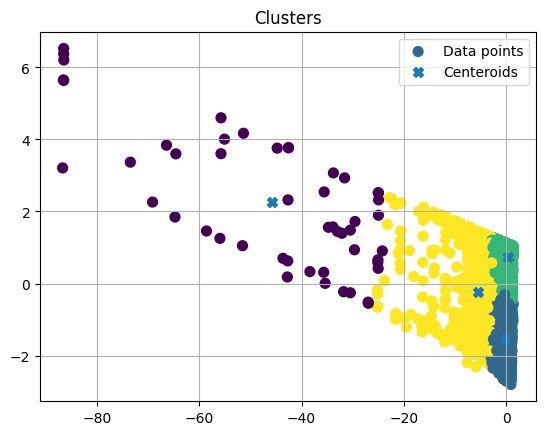

Iteration: 46


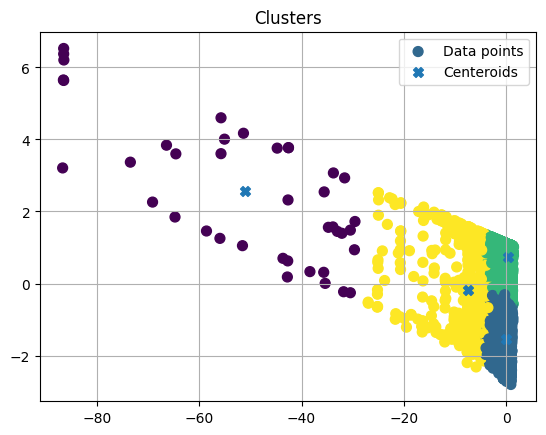

Iteration: 51


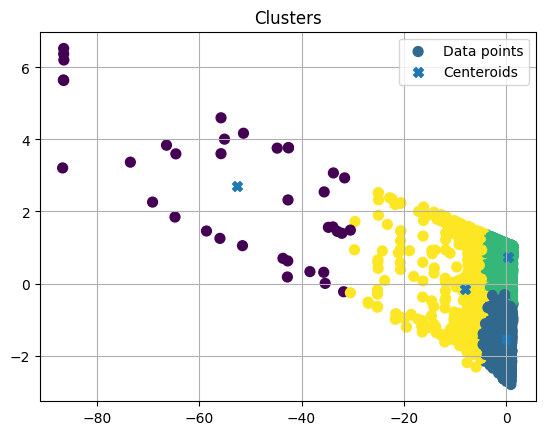

Last iteration: 56


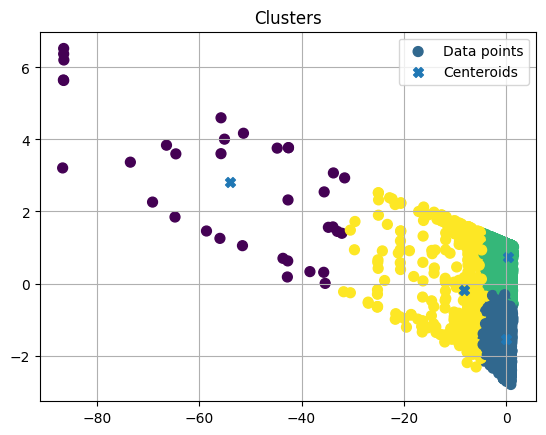

In [522]:
model = KMeans(4)
model.fit(X, visualize=True)

## Evaluating our model

Let's visualize the final clusters.

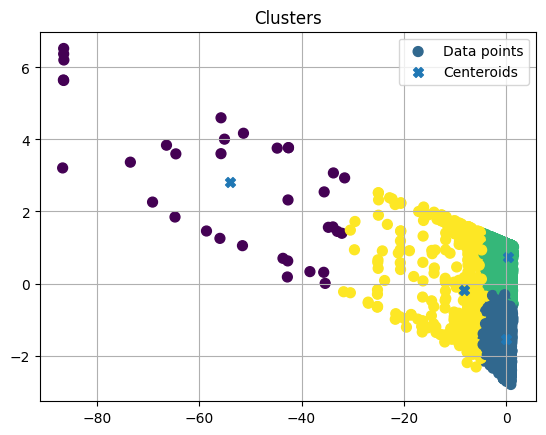

In [523]:
plot_clusters(X, model._centroids, model._labels)

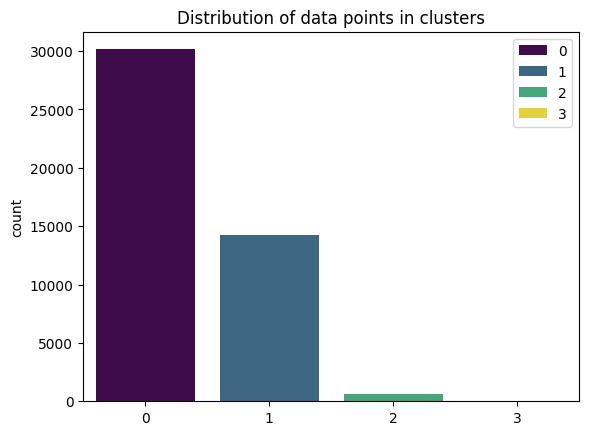

In [ ]:
def plot_cluster_distrib():
    plot = sns.countplot(x=model._labels, palette='viridis', hue=model._labels)
    plot.set_title('Distribution of data points in clusters')
    plt.show()

plot_cluster_distrib()

Let's insert the labels to the data.

In [ ]:
labeled_data = data.copy()
labeled_data['label'] = model._labels
labeled_data.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,label
0,0,40.64749,-73.97237,0,149,1,9,6,365,1
1,1,40.75362,-73.98377,1,225,1,45,2,355,1
2,1,40.80902,-73.94190,0,150,3,0,1,365,1
4,1,40.79851,-73.94399,1,80,10,9,1,0,0
5,1,40.74767,-73.97500,1,200,3,74,1,129,0


Let's do some analysis on the clusters.

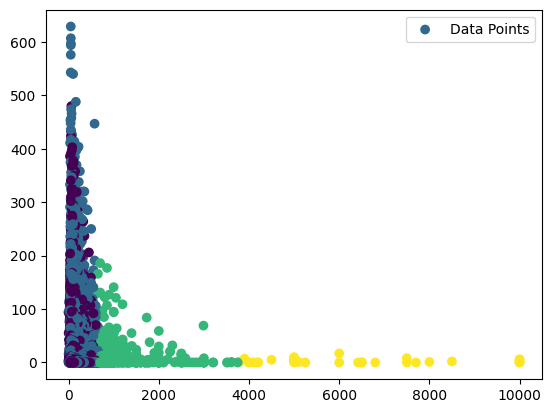

In [ ]:
plt.scatter(labeled_data['price'], labeled_data['number_of_reviews'], c=labeled_data['label'], label='Data Points')
plt.legend()
plt.show()